## Problem 3
Given the data in problem3.csv
- A. Fit a multivariate normal to the data.
- B. Given that fit, what is the distribution of X2 given X1=0.6. Use the 2 methods described
in class.
- C. Given the properties of the Cholesky Root, create a simulation that proves your
distribution of X2 | X1=0.6 is correct

Data Preview:
         x1        x2
0  0.116393  0.290704
1  0.121387 -0.042551
2  0.004184  0.040375
3 -0.129885 -0.013411
4 -0.076053  0.077160
Mean Vector (μ): [0.04600157 0.09991502]
Covariance Matrix (Σ):
[[0.0101622  0.00492354]
 [0.00492354 0.02028441]]

Method 1 (Multivariate Normal Distribution):
  Conditional Mean (μ_X2|X1=0.6): 0.3683249958609775
  Conditional Variance (σ²_X2|X1=0.6): 0.017898969645087522

Method 2 (OLS Regression):
  Conditional Mean: 0.3683249958609774
  Conditional Variance: 0.017898969645087526

Simulation Verification (Cholesky Root Method):
  Simulated Conditional Mean: 0.36717625331307724
  Simulated Conditional Variance: 0.01803273739460683


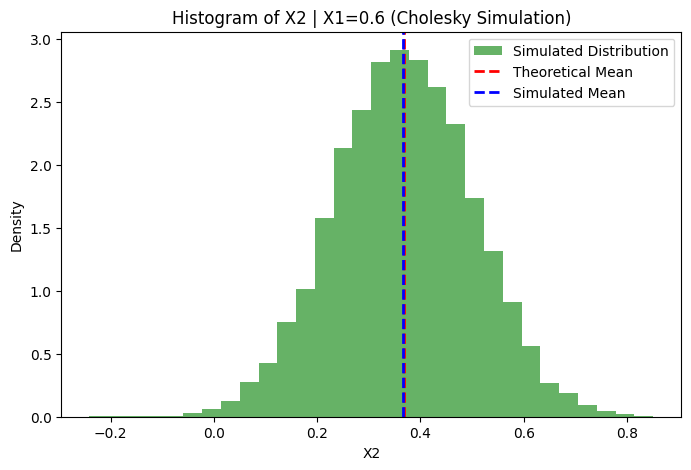

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("problem3.csv")

print("Data Preview:")
print(data.head())

# Compute mean vector and covariance matrix
mu = data.mean().values  # Mean vector
cov_matrix = data.cov().values  # Covariance matrix

print(f"Mean Vector (μ): {mu}")
print(f"Covariance Matrix (Σ):\n{cov_matrix}")

# Extract matrix components
sigma_11 = cov_matrix[0, 0]  # Variance of X1
sigma_22 = cov_matrix[1, 1]  # Variance of X2
sigma_12 = cov_matrix[0, 1]  # Covariance of X1 and X2

# Given value of X1
x1_given = 0.6  

# ===================== Method 1: Multivariate Normal Properties =====================
mu_x2_given_x1 = mu[1] + (sigma_12 / sigma_11) * (x1_given - mu[0])
var_x2_given_x1 = sigma_22 - (sigma_12**2 / sigma_11)

print("\nMethod 1 (Multivariate Normal Distribution):")
print(f"  Conditional Mean (μ_X2|X1=0.6): {mu_x2_given_x1}")
print(f"  Conditional Variance (σ²_X2|X1=0.6): {var_x2_given_x1}")

# ===================== Method 2: OLS Regression =====================
X1 = data.iloc[:, 0]  # First column (X1)
X2 = data.iloc[:, 1]  # Second column (X2)

X1_ols = sm.add_constant(X1)  # Add intercept term
model = sm.OLS(X2, X1_ols).fit()
beta_0, beta_1 = model.params  # Regression coefficients

# Compute conditional mean and variance
mu_ols = beta_0 + beta_1 * x1_given
residuals = X2 - model.predict(X1_ols)
sigma_ols = np.var(residuals, ddof=1)  # Residual variance

print("\nMethod 2 (OLS Regression):")
print(f"  Conditional Mean: {mu_ols}")
print(f"  Conditional Variance: {sigma_ols}")

# ===================== Simulation Verification (Cholesky Decomposition) =====================
L = np.linalg.cholesky(cov_matrix)  # Cholesky decomposition

# Generate samples
n_samples = 10000
z = np.random.normal(size=(n_samples, 2))  # Standard normal samples
simulated_data = mu + z @ L.T  # Transform to multivariate normal

# Select samples where X1 ≈ 0.6
simulated_x1_fixed = np.full(n_samples, x1_given)
simulated_x2 = mu[1] + (sigma_12 / sigma_11) * (simulated_x1_fixed - mu[0]) + \
               np.sqrt(var_x2_given_x1) * np.random.normal(size=n_samples)

# Compute simulated mean and variance
mu_sim = np.mean(simulated_x2)
sigma_sim = np.var(simulated_x2, ddof=1)

print("\nSimulation Verification (Cholesky Root Method):")
print(f"  Simulated Conditional Mean: {mu_sim}")
print(f"  Simulated Conditional Variance: {sigma_sim}")

# ===================== Plot Histogram of Simulated Conditional Distribution =====================
plt.figure(figsize=(8, 5))
plt.hist(simulated_x2, bins=30, density=True, alpha=0.6, color='g', label="Simulated Distribution")
plt.axvline(mu_x2_given_x1, color='r', linestyle='dashed', linewidth=2, label="Theoretical Mean")
plt.axvline(mu_sim, color='b', linestyle='dashed', linewidth=2, label="Simulated Mean")
plt.title("Histogram of X2 | X1=0.6 (Cholesky Simulation)")
plt.xlabel("X2")
plt.ylabel("Density")
plt.legend()
plt.show()
